# Deep Learning
# DL06 PM2.5 Prediccion MLP

## <font color='blue'>**Multilayer preceptron aplicado a series de tiempo univariadas**</font>


Una serie de tiempo es una serie de puntos de datos indexados (o listados o graficados) en orden de tiempo. Más comúnmente, una serie de tiempo es una secuencia tomada en sucesivos puntos equidistantes en el tiempo. Por lo tanto, es una secuencia de datos de tiempo discreto. Ejemplos de series temporales son las alturas de las mareas oceánicas, los recuentos de manchas solares y el valor de cierre diario del Promedio Industrial Dow Jones.

Las series temporales se trazan con mucha frecuencia a través de gráficos de líneas. Las series de tiempo se usan en estadística, procesamiento de señales, reconocimiento de patrones, econometría, finanzas matemáticas, pronóstico del tiempo, predicción de terremotos, electroencefalografía, ingeniería de control, astronomía, ingeniería de comunicaciones y en gran medida en cualquier dominio de la ciencia aplicada y la ingeniería que involucra mediciones temporales.

El término __serie temporal univariadas__, se refiere a una serie temporal que consiste en observaciones individuales (escalares) registradas secuencialmente en incrementos de tiempo iguales.
    
En este notebook, utilizaremos un perceptrón multicapa para desarrollar modelos de pronóstico de series temporales univariadas.
El conjunto de datos utilizado para los ejemplos de este notebook es sobre la contaminación del aire medida por la concentración de material particulado (PM) de diámetro menor o igual a 2.5 micrómetros. Hay otras variables
tales como presión de aire, temperatura del aire, punto de rocío, que tambien serán utilizadas para realizar predicciones.


En este caso, se desarrollará un modelo de series temporales: para la predicción de pm2.5.

El notebook se divide en las siguientes etapas:
1. Visualización de la data
2. Procesamiento de la data
3. Construcción del modelo y su entrenamiento con Keras
4. Resultados y validación del modelo.


Importancia de la predicción del material particulado:

El material particulado respirable presente en la atmósfera de nuestras ciudades en forma sólida o líquida (polvo, cenizas, hollín, partículas metálicas, cemento y polen, entre otras) se puede dividir, según su tamaño, en dos grupos principales. A las de diámetro aerodinámico igual o inferior a los 10 µm o 10 micrómetros (1 $\mu m$ corresponde a la milésima parte de un milímetro) se las denomina PM10 y a la fracción respirable más pequeña, PM2,5. Estas últimas están constituidas por aquellas partículas de diámetro aerodinámico inferior o igual a los 2,5 micrómetros, es decir, son 100 veces más delgadas que un cabello humano.


El conjunto de datos se ha descargado del repositorio de aprendizaje automático de UCI.

https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

In [1]:
#Montar Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Etapa 1. Visualización de la data

En esta etapa nos hacemos una idea de como es la distribución de la data. Entre que valores fluctua,  en el caso de las series de tiempo univariadas, es natural realizar Boxplots y graficos de tiempo. Las librerías tipicas que utilizaremos en esta etapa son: `pandas`, `matplotlib`, `numpy` y `seaborn`.


In [2]:
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [3]:
#set current working directory
path = '/content/drive/MyDrive/Gonzalo/CD-P2 DEEP LEARNING/CLASE 4'
os.chdir(path)

In [4]:
#Read the dataset into a pandas.DataFrame
df = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')

In [5]:
#Cargar archivo subido
df = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')

## <font color='green'>**Actividad 1**</font>

En esta actividad queremos visualizar nuestra data.  (30 minutos)

1. ¿Cuantos valores nulos tenemos?, como los podemos tratar. ¿Probemos borrando data?

2. Cree una columna que se llame datetime y ordenelo en forma ascendente. Puede mirar el siguiente código para inspirarse.

```python
df['datetime'] = df[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'],
                                                                                          hour=row['hour']), axis=1)
df.sort_values('datetime', ascending=True, inplace=True)
```

3. Visualice la serie de tiempo para la variable pm2.5. Utilice gráficos de línea, box plots e histogramas. Visualice distintos periodos de tiempo, se observa el tamaño del ciclo?



Primeras filas del dataset:
   No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0

Información del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8 

<ipython-input-6-37f9c0d440de>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[['year', 'month', 'day', 'hour']] = df_clean[['year', 'month', 'day', 'hour']].apply(pd.to_numeric)
<ipython-input-6-37f9c0d440de>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['datetime'] = df_clean[['year', 'month', 'day', 'hour']].apply(
<ipython-input-6-37f9c0d440de>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

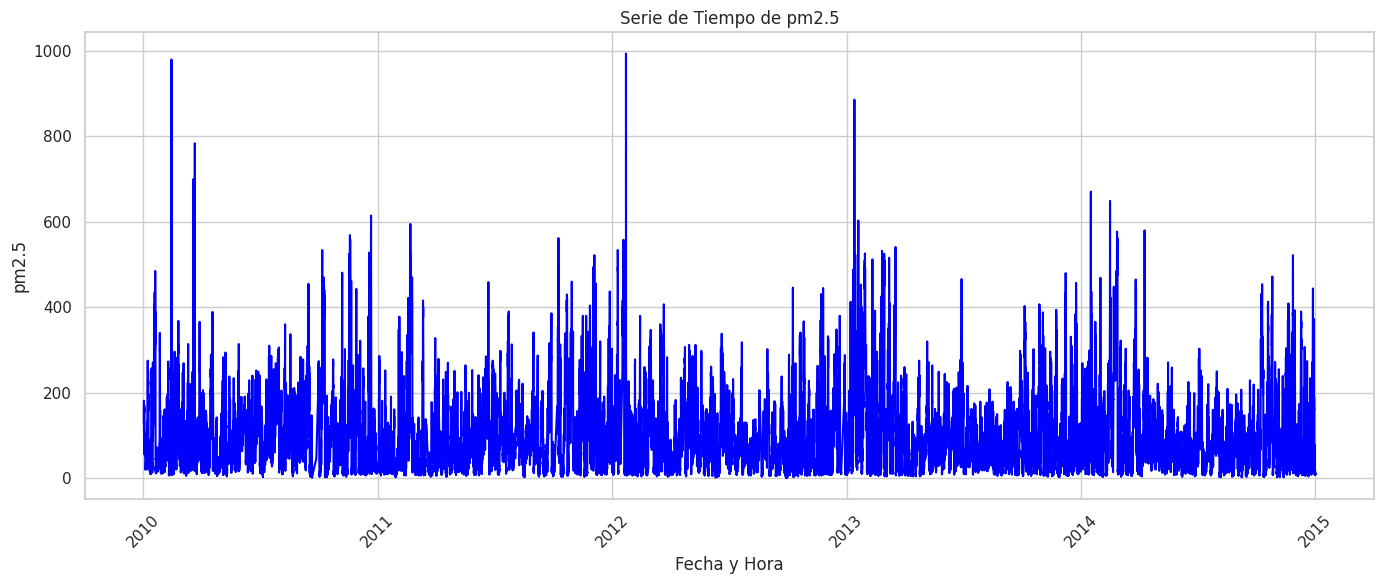

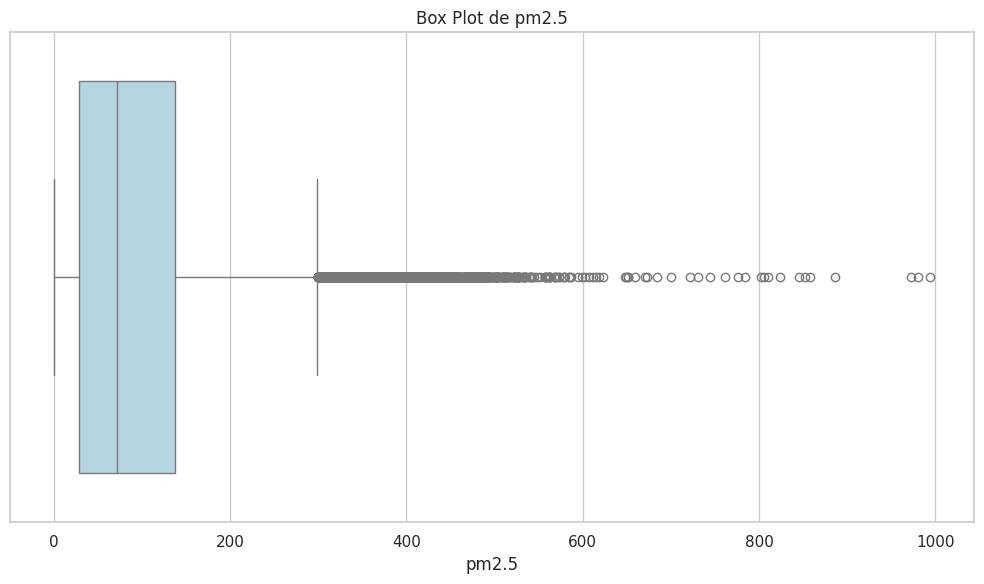

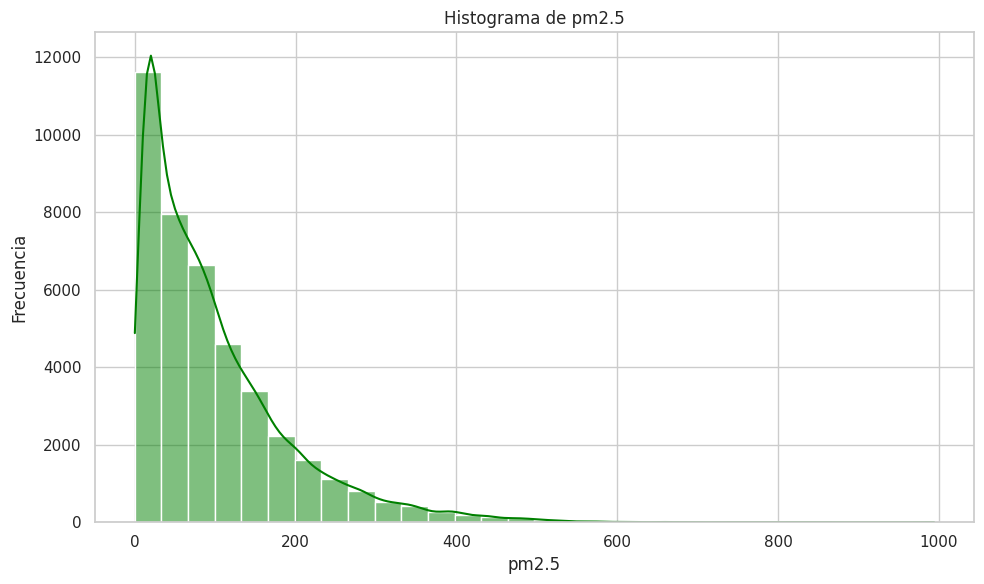

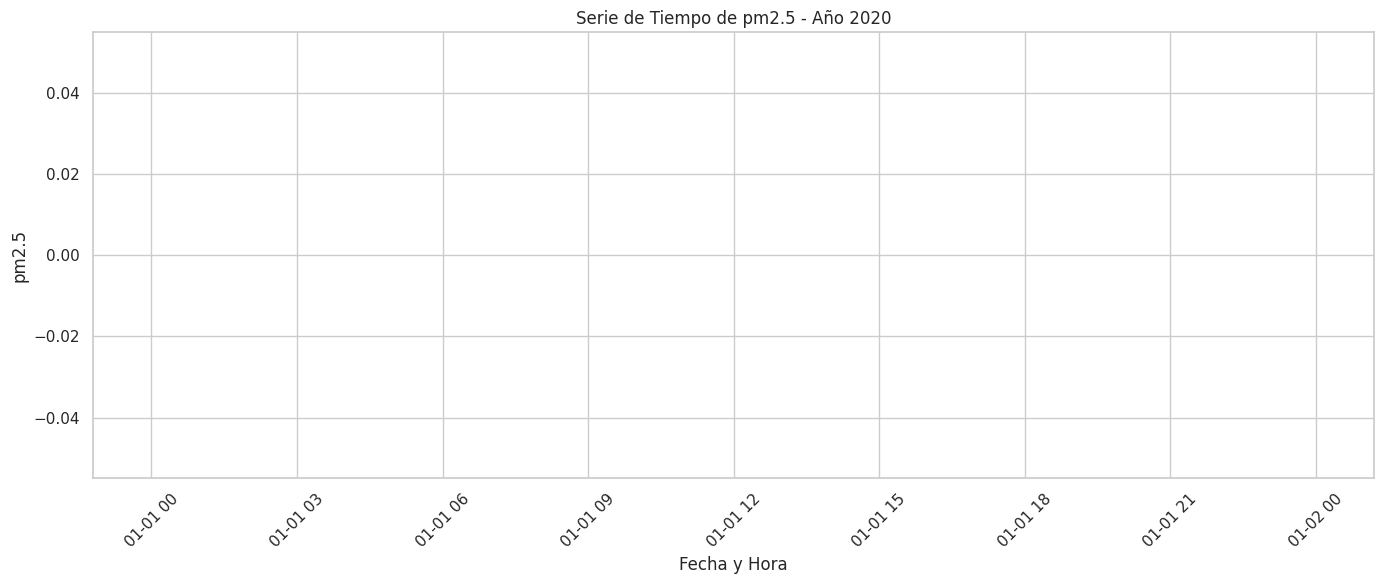

<ipython-input-6-37f9c0d440de>:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['month_numeric'] = df_clean['datetime'].dt.month
<ipython-input-6-37f9c0d440de>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_mes.index, y=media_mes.values, palette="viridis")


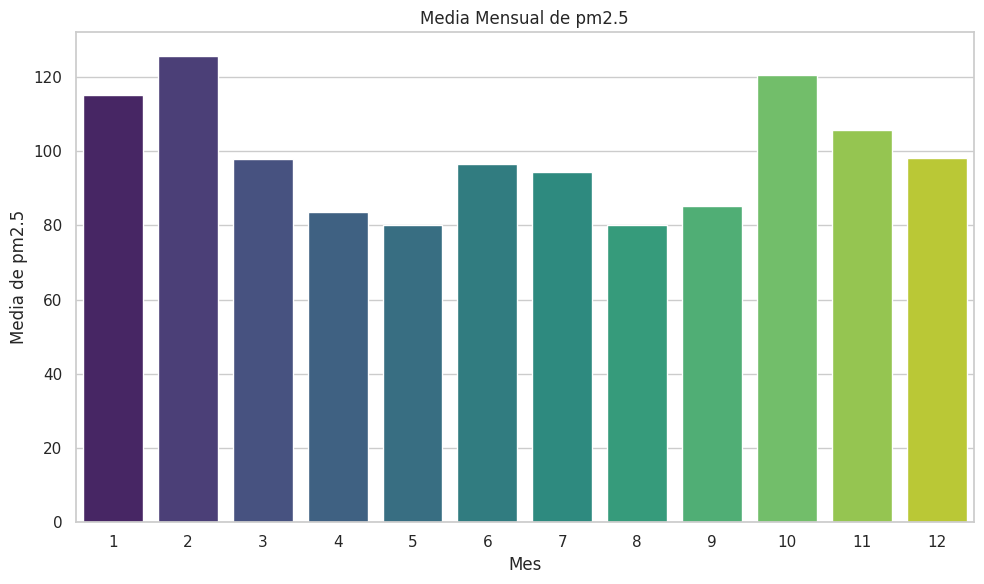

In [6]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


# --- Exploración inicial de los datos ---

print("Primeras filas del dataset:")
print(df.head())

# Revisar información general para saber tipos de datos y valores nulos
print("\nInformación del dataframe:")
print(df.info())

# Conteo de valores nulos por columna
print("\nValores nulos por columna:")
nulos = df.isnull().sum()
print(nulos)

# --- Tratamiento de valores nulos ---
#eliminamos las filas con valores nulos
df_clean = df.dropna()
print("\nDimensiones del dataframe original:", df.shape)
print("Dimensiones después de eliminar nulos:", df_clean.shape)

# También se podrían considerar otras estrategias, como imputación con la media o mediana, dependiendo del caso.

# --- Creación de la columna 'datetime' ---

df_clean[['year', 'month', 'day', 'hour']] = df_clean[['year', 'month', 'day', 'hour']].apply(pd.to_numeric)

# Crear columna 'datetime'
df_clean['datetime'] = df_clean[['year', 'month', 'day', 'hour']].apply(
    lambda row: datetime.datetime(year=int(row['year']),
                                  month=int(row['month']),
                                  day=int(row['day']),
                                  hour=int(row['hour'])),
    axis=1
)

# Ordenar el dataframe de manera ascendente según la nueva columna 'datetime'
df_clean.sort_values('datetime', ascending=True, inplace=True)

# --- Visualización de la serie de tiempo para la variable pm2.5 ---
# Ajuste del estilo de los gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Gráfico de línea
plt.plot(df_clean['datetime'], df_clean['pm2.5'], color='blue')
plt.title('Serie de Tiempo de pm2.5')
plt.xlabel('Fecha y Hora')
plt.ylabel('pm2.5')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean['pm2.5'], color='lightblue', orient="h")
plt.title('Box Plot de pm2.5')
plt.xlabel('pm2.5')
plt.tight_layout()
plt.show()

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['pm2.5'], bins=30, kde=True, color='green')
plt.title('Histograma de pm2.5')
plt.xlabel('pm2.5')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# --- Visualización de distintos periodos de tiempo ---
# Por ejemplo, filtramos datos de un año en particular
# Supongamos que queremos ver el año 2020
df_2020 = df_clean[df_clean['datetime'].dt.year == 2020]

plt.figure(figsize=(14, 6))
plt.plot(df_2020['datetime'], df_2020['pm2.5'], color='red')
plt.title('Serie de Tiempo de pm2.5 - Año 2020')
plt.xlabel('Fecha y Hora')
plt.ylabel('pm2.5')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# También se pueden realizar comparaciones por estaciones o meses para observar los ciclos
# Por ejemplo, agrupamos por mes y calculamos la media
df_clean['month_numeric'] = df_clean['datetime'].dt.month
media_mes = df_clean.groupby('month_numeric')['pm2.5'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=media_mes.index, y=media_mes.values, palette="viridis")
plt.title('Media Mensual de pm2.5')
plt.xlabel('Mes')
plt.ylabel('Media de pm2.5')
plt.tight_layout()
plt.show()

# Con estos gráficos podrás observar si hay algún patrón cíclico, por ejemplo diario, mensual o anual.


<font color='green'>**Fin Actividad 1**</font>

### Datos faltantes:

En los datos de series de tiempo, si faltan valores, hay dos formas de tratar los datos incompletos:

1. Omita todo el registro que contiene información.
2. Imputar la información que falta.

Dado que los datos de series temporales tienen propiedades temporales, solo algunas de las metodologías estadísticas son apropiadas para los datos de series temporales.

Metodos elementales de imputación:
1. Con la media
2. Con la mediana
3. Con la moda
4. Calcular el valor apropiado y reeemplazar los NAs
5. Usar modelos estadísticos y de Machine Leaning (e.g. K-NN).

In [7]:
"""
Las filas que tienen valores de NaN en la columna pm2.5 se descartan. Debemos considerar en
el caso que los NaN son demasiados o nos afecten en nuestras predicciones, existen metodos para ir rellenando los valores.
La opción mas directa es eliminarlos. Veamos si esto nos afecta en nuestro modelo.
"""
df['pm2.5'].isna().sum()
df.dropna(subset=['pm2.5'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

En las series de tiempo el orden es fundamental.
Para asegurarse que las filas estén en el orden correcto con las fechas y horas de las observaciones, se crea una nueva columna `datetime` a partir de las columnas relacionadas `year`, `month`, `day`, `hour` del DataFrame.
La nueva columna consta de los objetos DateTime.datetime de Python. El DataFrame se ordena en orden ascendente sobre esta columna.

In [8]:
df['datetime'] = df[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'],
                                                                                          hour=row['hour']), axis=1)
df.sort_values('datetime', ascending=True, inplace=True)

Un box plot es una forma estandarizada de mostrar la distribución de datos basada en un resumen de cinco números
("mínimo", primer cuartil (Q1), mediana, tercer cuartil (Q3) y "máximo"). Puede informarle sobre sus valores atípicos
y cuáles son sus valores. También puede decirle si sus datos son simétricos, qué tan estrechamente están agrupados, y si sus datos están sesgados.

Necesita tener información sobre la variabilidad o dispersión de los datos. Un box plot es un gráfico que le da una buena indicación de cómo se distribuyen los valores en los datos. Aunque los box plots pueden parecer primitivos en comparación con un histograma o gráfico de densidad, tienen la ventaja de ocupar menos espacio, lo cual es útil al comparar distribuciones entre muchos grupos o conjuntos de datos.

![Funcion logistica](https://drive.google.com/uc?export=view&id=1pd8fVkKl7jl-YtHVpyYdWkX9FHRE30lm)





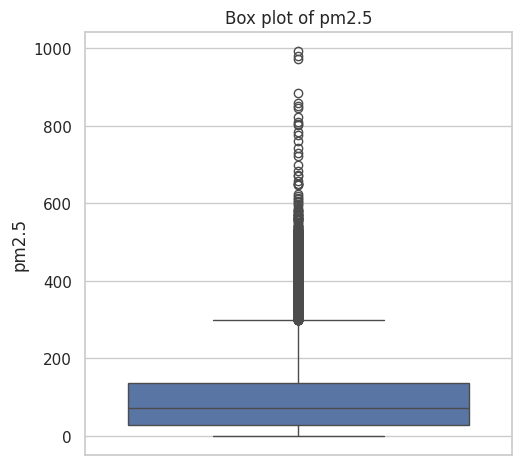

In [9]:
#Let us draw a box plot to visualize the central tendency and dispersion of PRES
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(df['pm2.5'])
g.set_title('Box plot of pm2.5')
plt.savefig('B07887_05_06.png', format='png', dpi=300)

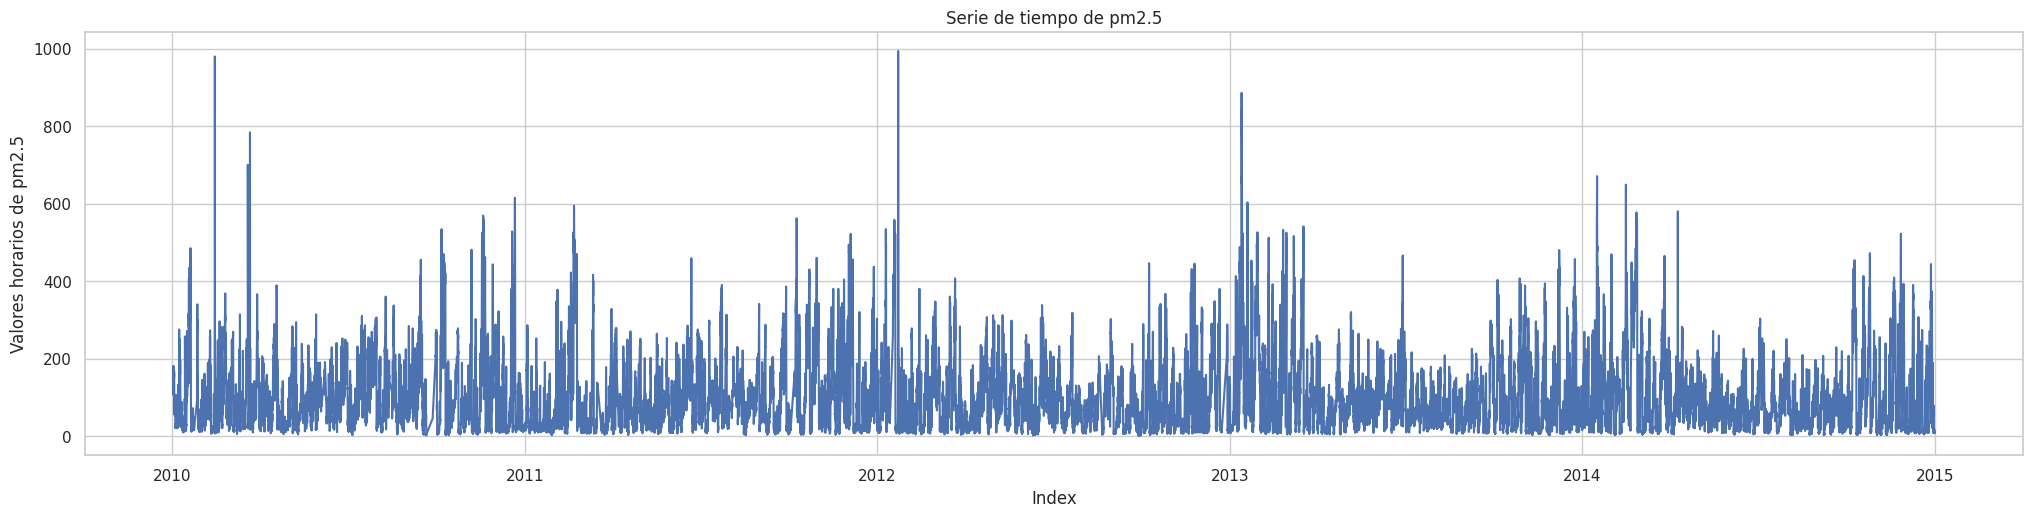

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'df' es tu DataFrame y tiene columnas 'datetime' y 'pm2.5'

plt.figure(figsize=(25, 5.5))
g = sns.lineplot(x=df['datetime'], y=df['pm2.5'])
g.set_title('Serie de tiempo de pm2.5')
g.set_xlabel('Index')
g.set_ylabel('Valores horarios de pm2.5')
plt.savefig('B07887_05_10.png', format='png', dpi=300)


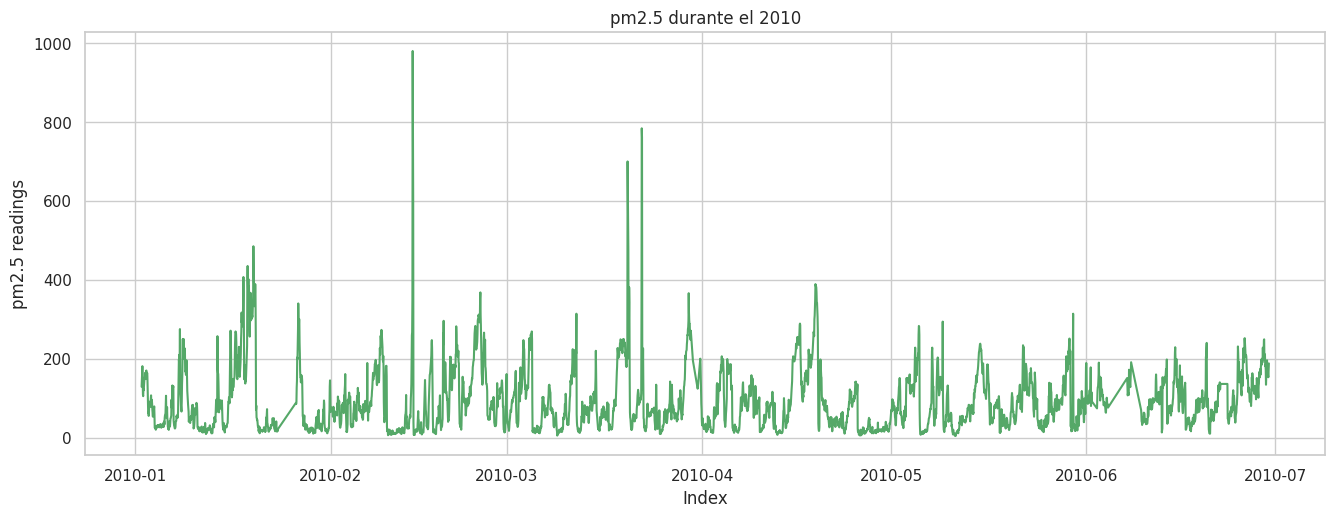

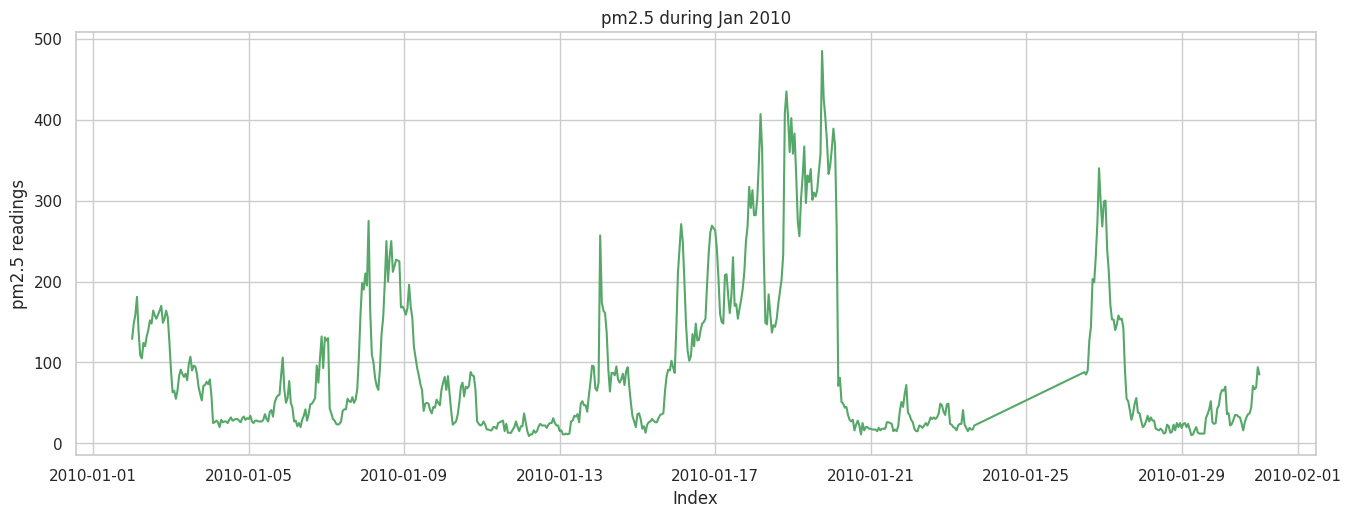

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Dibujemos la serie para los 6 primeros meses y veamos si existe algún patrón.
plt.figure(figsize=(16, 5.5))
g = sns.lineplot(x=df['datetime'], y=df['pm2.5'].loc[df['datetime'] <= datetime.datetime(year=2010, month=6, day=30)], color='g')
g.set_title('pm2.5 durante el 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')
plt.savefig('B07887_05_07.png', format='png', dpi=300)

# Miremos el caso de un mes.
plt.figure(figsize=(16, 5.5))
g = sns.lineplot(x=df['datetime'], y=df['pm2.5'].loc[df['datetime'] <= datetime.datetime(year=2010, month=1, day=31)], color='g')
g.set_title('pm2.5 during Jan 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')
plt.savefig('B07887_05_08.png', format='png', dpi=300)


### Etapa 2. Preprocesamiento de la data

En esta segunda etapa preparamos los datos con el objetivo de realizar un entrenamiento robusto de nuestra red neuronal. Usualmente los datos como primera etapa se normalizan. Empiricamente se ha observando que los datos normalizados (No siempre) generan modelos de clasificiación y de regresión con mejores metricas que los no normalizadas. Por otra parte, Los algoritmos de descenso de gradiente funcionan mejor (por ejemplo, convergen más rápido) si las variables están dentro del rango $[-1, 1]$. Muchas fuentes relajan el límite incluso $[-3, 3]$.

Posteriormente los datos debens ser separados en tres conjuntos: Entrenamiento, validación y test. Usualmente el ultimo de test se utiliza con una prueba nueva de datos. Finalmente debemos construir el conjunto de vectores que serán utilizados para entrenar la red neuronal perceptron multicapa. Las librerias. Adicionalmente en esta sección utilizaremos la librería `sklearn` para realizar la normalización.


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df['scaled_pm2.5'] = scaler.fit_transform(np.array(df['pm2.5']).reshape(-1, 1)) # Nos lo deja como vector.

In [13]:
import joblib

# Guardemos el escalador
fileoutScaler = 'scaler_model.sav'
joblib.dump(scaler, fileoutScaler)


['scaler_model.sav']

<p style='text-align: justify;'>
Antes de entrenar el modelo, el conjunto de datos se divide en dos partes: conjunto de entrenamiento y conjunto de validación.
La red neuronal se entrena en el conjunto de entrenamiento. Esto significa el cálculo de la función de pérdida, backpropagation
y los pesos actualizados por un algoritmo de descenso de gradiente se realizan en el conjunto de entrenamiento. El conjunto de validación se utiliza para evaluar el modelo y para determinar el número de epochs en el entrenamiento del modelo. Aumentando el número de epochs disminuirán aún más la función de pérdida en el conjunto de entrenamiento, pero es posible que no necesariamente tengan el mismo efecto para el conjunto de validación debido al sobreajuste en el conjunto de entrenamiento. Utilizamos Keras con el backend Tensorflow para definir y entrenar el modelo. Todos los pasos involucrados en la capacitación y validación del modelo se realizan llamando a las funciones apropiadas de la API de Keras.
 </p>

In [14]:
"""
Comencemos dividiendo el conjunto de datos en entrenamiento y validación. El período de tiempo del conjunto de datos si es de
1 de enero de 2010 al 31 de diciembre de 2014. Los primeros cuatro años: 2010 a 2013 se utiliza como entrenamiento y
2014 se mantiene para validación.
"""
# Utilizamos pandas para realizar este proceso.
split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
df_train = df.loc[df['datetime'] < split_date]
df_val = df.loc[df['datetime'] >= split_date]
print('Shape of train:', df_train.shape)
print('Shape of test:', df_val.shape)

Shape of train: (33096, 15)
Shape of test: (8661, 15)


In [15]:
#Miremos nuestro conjunto de entrenamiento
df_train.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_pm2.5
0,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00,0.129779
1,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00,0.148893
2,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00,0.159960
3,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00,0.182093
4,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00,0.138833


In [16]:
#Miremos nuestro conjunto de validación
df_val.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_pm2.5
33096,35065,2014,1,1,0,24.0,-20,7.0,1014.0,NW,143.48,0,0,2014-01-01 00:00:00,0.024145
33097,35066,2014,1,1,1,53.0,-20,7.0,1013.0,NW,147.50,0,0,2014-01-01 01:00:00,0.053320
33098,35067,2014,1,1,2,65.0,-20,6.0,1013.0,NW,151.52,0,0,2014-01-01 02:00:00,0.065392
33099,35068,2014,1,1,3,70.0,-20,6.0,1013.0,NW,153.31,0,0,2014-01-01 03:00:00,0.070423
33100,35069,2014,1,1,4,79.0,-18,3.0,1012.0,cv,0.89,0,0,2014-01-01 04:00:00,0.079477


In [18]:
#Vamos a resetar los indices para ser ordenados
df_val.reset_index(drop=True, inplace=True)

Text(0, 0.5, 'Valores escalados de pm2.5')

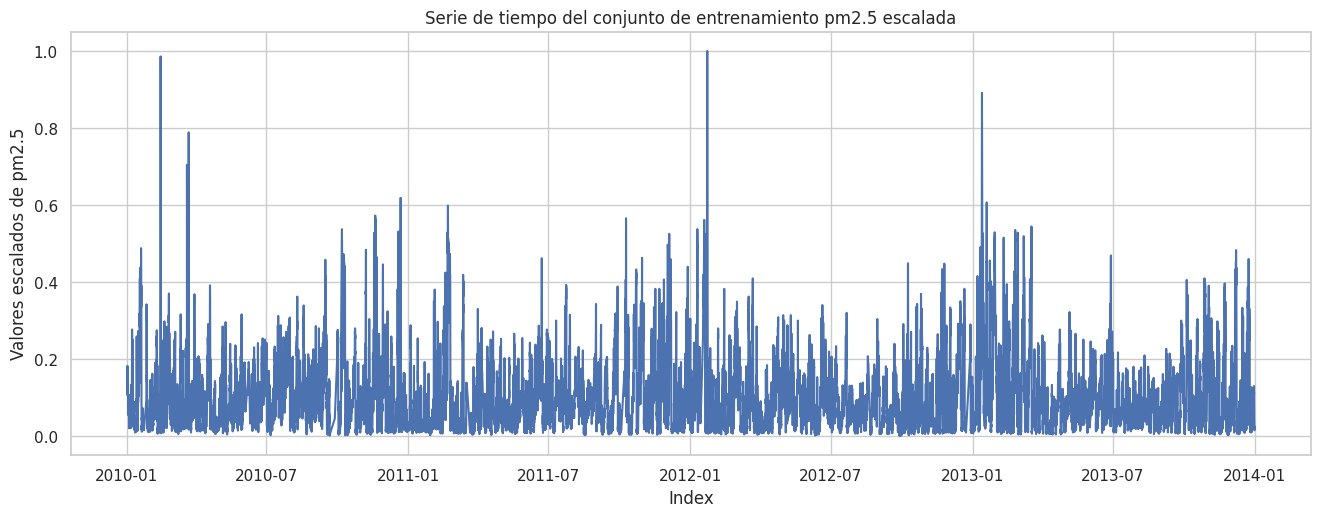

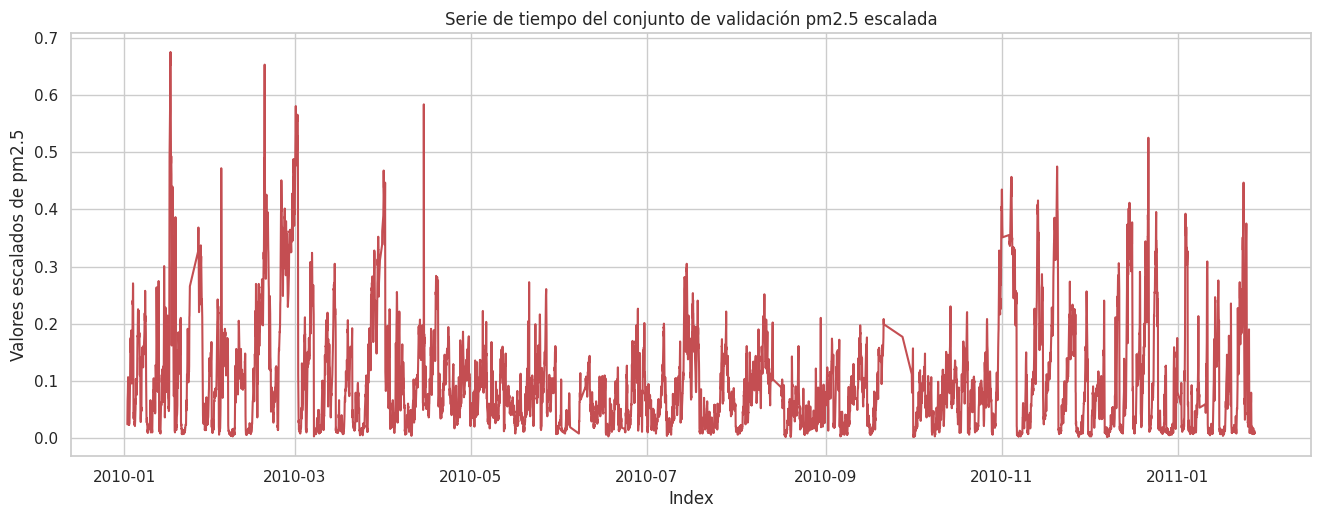

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'df', 'df_train' y 'df_val' son tus DataFrames y tienen las columnas necesarias

"""
El conjunto de entrenamiento y validación lo volvemos a dibujar.
"""

plt.figure(figsize=(16, 5.5))
g = sns.lineplot(x=df['datetime'], y=df_train['scaled_pm2.5'], color='b')
g.set_title('Serie de tiempo del conjunto de entrenamiento pm2.5 escalada')
g.set_xlabel('Index')
g.set_ylabel('Valores escalados de pm2.5')

plt.figure(figsize=(16, 5.5))
g = sns.lineplot(x=df['datetime'], y=df_val['scaled_pm2.5'], color='r')
g.set_title('Serie de tiempo del conjunto de validación pm2.5 escalada')
g.set_xlabel('Index')
g.set_ylabel('Valores escalados de pm2.5')



Ahora necesitamos generar vectores ($X$) y una variable objetivo ($y$) para entrenar y validar. La matriz de los regresores o variables independientes y la matriz  de la variable dependiente se crean a partir de la matriz 1-D original de la columna `scaled_pm2.5`. Para el modelo de pronóstico de series de tiempo, los últimos siete días de observaciones se utilizan para predecir el día siguiente, este valor se estudia y se pueden ejercitar distintas ventanas de tiempo. el dia 7 surge de la observación de los gráficos de linea.  Definimos una función que toma la serie de tiempo original y el número de pasos de tiempo en los regresores como entrada para generar las matrices de $X$ e $y$.

In [20]:
def makeXy(ts, nb_timesteps):
    """
    Input:
           ts: serie de tiempo original.
           nb_timesteps: Ventana de tiempo.
    Output:
           X: 2-D array de los regresores o variables independientes.
           y: 1-D array de variable dependiente.
    """
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]):
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
    X, y = np.array(X), np.array(y) # Lo tranformamos a nparray
    return X, y

In [21]:
X_train, y_train = makeXy(df_train['scaled_pm2.5'], 7)
print('Shape of train arrays:', X_train.shape, y_train.shape)

Shape of train arrays: (33089, 7) (33089,)


In [22]:
X_val, y_val = makeXy(df_val['scaled_pm2.5'], 7)
print('Shape of validation arrays:', X_val.shape, y_val.shape)

Shape of validation arrays: (8654, 7) (8654,)


### Etapa 3. Definiendo el modelo de perceptron de multicapa en Keras
<p style='text-align: justify;'>
Un solo perceptrón solo se puede utilizar para implementar funciones separables linealmente. Toma entradas reales y booleanas y les asocia un conjunto de pesos, junto con un sesgo (el umbral que mencioné anteriormente). Aprendemos los pesos, obtenemos la función. Usemos un perceptrón para aprender una función OR. </p>

![Perceptron](https://drive.google.com/uc?export=view&id=1Kp8OYWpZbPX3PNkbsw154Q8KOqbdicuf)



![Perceptron Matematica](https://drive.google.com/uc?export=view&id=1_RhrJBSBSsjbpc89XGrX32VDec7WmLXA)


<p style='text-align: justify;'>
Como su nombre indica, el MLP es esencialmente una combinación de capas de perceptrones entrelazados. Utiliza las salidas de la primera capa como entradas de la siguiente capa hasta que finalmente, después de un número particular de capas, alcanza la capa de salida. Las capas entre las capas de entrada y salida se denominan capas ocultas. Al igual que con el perceptrón, MLP también tiene pesos que se deben ajustar para entrenar el sistema. Estos pesos ahora vienen en forma de matriz en cada unión entre capas. </p>



![MLP](https://drive.google.com/uc?export=view&id=15L2S9jFGi_j7E2KNK2p6Gno1_xKZbeQP)


<p style='text-align: justify;'>
La primera parte de la creación de un MLP es definir una topología y desarrollar el algoritmo feedforward. Feedforward es esencialmente el proceso utilizado para convertir la entrada en una salida. Sin embargo, no es tan simple como en el perceptrón, ya que ahora necesita iterar sobre varias capas. Usando operaciones matriciales</p>

Ahora definimos el MLP usando el framework de redes neuronales `Keras`. En este enfoque, una capa se puede declarar como la entrada de la siguiente capa al momento de definir la siguiente capa.

In [23]:
from keras.layers import Dense, Input, Dropout
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [24]:
# Defina la capa de entrada que tiene forma (, 7) y de tipo float32. Ninguno indica el número de instancias
input_layer = Input(shape=(7,), dtype='float32')

#### Funciones de activación

La función de activación no es más que una función matemática que toma una entrada y produce una salida. La función se activa cuando el resultado calculado alcanza el umbral especificado.
![Funcion Activacion](https://drive.google.com/uc?export=view&id=1w3slknVN9VGDmQzHDoPxhRCQZ1xFwmvN)



In [25]:
#Las capas densas se definen con activación tanh.
dense1 = Dense(32, activation='tanh')(input_layer)
dense2 = Dense(16, activation='tanh')(dense1)
dense3 = Dense(16, activation='tanh')(dense2)

#### Dropout
<p style='text-align: justify;'>
Múltiples capas ocultas y una gran cantidad de neuronas en cada capa oculta les da a las redes neuronales la capacidad de modelar la no linealidad compleja de las relaciones subyacentes entre los regresores y el objetivo. Sin embargo, las redes neuronales profundas también pueden sobreajustar los datos de validación y dar malos resultados en la validación o el conjunto de pruebas. El dropout se ha utilizado efectivamente para regularizar redes neuronales profundas. En este ejemplo, se agrega una capa de Salida antes de la capa de salida. El dropout establece aleatoriamente p fracción de neuronas de entrada a cero antes de pasar a la siguiente capa. La eliminación aleatoria de entradas actúa esencialmente como un tipo de agrupamiento o metamodelo bagging.  Usamos p = 0.2 para abandonar el 20% de las características de entrada seleccionadas al azar.</p>

<p style='text-align: justify;'>
En el aprendizaje automático, la regularización es una forma de evitar el sobreajuste. La regularización reduce el sobreajuste al agregar una penalización a la función de pérdida. Al agregar esta penalización, el modelo se entrena de tal manera que no aprende pesos de conjunto de características interdependientes. Aquellos de ustedes que conocen la Regresión logística pueden estar familiarizados con las penalizaciones L1 (Laplaciana) y L2 (Gaussiana).</p>

![Dropout](https://drive.google.com/uc?export=view&id=1WwBQnaNmT2CfkPR439-uR_5pOy-kAluK)


El dropout obliga a una red neuronal a aprender características más robustas que son útiles junto con muchos subconjuntos aleatorios diferentes de las otras neuronas.

In [26]:
dropout_layer = Dropout(0.2)(dense3)

In [27]:
# Finalmente, la capa de salida da predicción para la presión de aire del día siguiente.
output_layer = Dense(1, activation='linear')(dropout_layer)

Las capas de entrada, densa y de salida ahora se empaquetarán dentro de un Modelo, que es una clase envolvente para entrenar y hacer predicciones. El box plot de pm2.5 muestra la presencia de valores atípicos. Por lo tanto, el error absoluto medio (MAE) se usa ya que las desviaciones absolutas sufren menos fluctuaciones en comparación con las desviaciones al cuadrado.

Los pesos de la red están optimizados por el algoritmo Adam. Adam representa la estimación del momento adaptativo y ha sido una opción popular para entrenar redes neuronales profundas. A diferencia del descenso de gradiente estocástico, Adam usa diferentes tasas de aprendizaje para cada peso y actualiza por separado lo mismo a medida que avanza el entrenamiento. La tasa de aprendizaje de un peso se actualiza con base en promedios móviles ponderados exponencialmente de los gradientes del peso y los gradientes al cuadrado.

### Loss Functions
<p style='text-align: justify;'>
Las máquinas aprenden mediante una función de pérdida. Es un método para evaluar qué tan bien el algoritmo específico modela los datos dados. Si las predicciones se desvían demasiado de los resultados reales, la función de pérdida arrojaría un número muy grande. Gradualmente, con la ayuda de alguna función de optimización, la función de pérdida aprende a reducir el error en la predicción. </p>

<p style='text-align: justify;'>
No existe una función de pérdida única para todos los algoritmos en el aprendizaje automático. Hay varios factores involucrados en la elección de una función de pérdida para un problema específico, como el tipo de algoritmo de aprendizaje automático elegido, la facilidad de calcular las derivadas y, en cierta medida, el porcentaje de valores atípicos en el conjunto de datos.
    </p>

<p style='text-align: justify;'>
    En términos generales, las funciones de pérdida se pueden clasificar en dos categorías principales según el tipo de tarea de aprendizaje con la que nos estamos ocupando: pérdidas de regresión y pérdidas de clasificación. En la clasificación, estamos tratando de predecir la salida del conjunto de valores categóricos finitos, es decir, dado un gran conjunto de datos de imágenes de dígitos escritos a mano, categorizándolos en uno de 0 a 9 dígitos. La regresión, por otro lado, trata de predecir un valor continuo, por ejemplo, dada la superficie del piso, el número de habitaciones, el tamaño de las habitaciones, predecir el precio de la habitación.</p>
    
**Regression Losses:**

1. Mean Square Error (L2) $MSE = \frac{\sum_{y=1}^n(y_i - \hat{y_i})^2}{n}$

Como su nombre indica, el error cuadrático medio se mide como el promedio de la diferencia cuadrática entre las predicciones y las observaciones reales. Solo le preocupa la magnitud promedio del error, independientemente de su dirección. Sin embargo, debido a la cuadratura, las predicciones que están muy lejos de los valores reales se penalizan fuertemente en comparación con las predicciones menos desviadas. Además, MSE tiene buenas propiedades matemáticas que facilitan el cálculo de gradientes.

2. Mean Absolute Error (L1) $MAE = \frac{\sum_{y=1}^n|y_i - \hat{y_i}|}{n}$

El error absoluto medio, por otro lado, se mide como el promedio de la suma de las diferencias absolutas entre las predicciones y las observaciones reales. Al igual que MSE, esto también mide la magnitud del error sin considerar su dirección. A diferencia de MSE, MAE necesita herramientas más complicadas como la programación lineal para calcular los gradientes. Además, MAE es más robusto para los valores atípicos, ya que no utiliza el cuadrado.

3. Mean Bias Error $MBE = \frac{\sum_{y=1}^n (y_i - \hat{y_i})}{n} $

**Classification Losses:**

1. Cross Entropy Loss = $ -(y_ilog(\hat(y_i)+(1-y_i)log(1-\hat{y_i})$

Tenga en cuenta que cuando la etiqueta real es 1 (y(i) = 1), la segunda mitad de la función desaparece, mientras que en caso de que la etiqueta real sea 0 (y (i) = 0), la primera mitad se descarta. En resumen, solo estamos multiplicando el registro de la probabilidad pronosticada real para la clase de verdad básica. Un aspecto importante de esto es que la pérdida de entropía cruzada penaliza fuertemente las predicciones que son confiables pero erróneas.

#### Metodos de optimización:

<p style='text-align: justify;'>
El aprendizaje profundo es un proceso iterativo. Con tantos parámetros para ajustar o métodos para probar, es importante poder entrenar modelos rápidamente, para completar rápidamente el ciclo iterativo. Esto es clave para aumentar la velocidad y la eficiencia de un equipo de aprendizaje automático.
De ahí la importancia de los algoritmos de optimización, como el descenso de gradiente estocástico, el descenso de gradiente de lote mínimo, el descenso de gradiente con impulso y el optimizador Adam.</p>
<p style='text-align: justify;'>
Estos métodos hacen posible que nuestra red neuronal aprenda. Sin embargo, algunos métodos funcionan mejor que otros en términos de velocidad. </p>


1. Mini-batch gradient descent: El descenso de gradiente tradicional necesita procesar todos los ejemplos de entrenamiento antes de realizar la primera actualización de los parámetros. En su lugar de eso, considere dividir el conjunto de prueba en conjuntos más pequeños. Cada conjunto pequeño se llama mini lote. Digamos que cada mini lote tiene 64 puntos de entrenamiento. ¡Entonces, podríamos entrenar el algoritmo en un mini lote a la vez y dar un paso una vez que se realice el entrenamiento para cada mini lote!

2. Gradient descent with momentum: El descenso de gradiente con momentum implica aplicar un suavizado exponencial al gradiente calculado. Esto acelerará el entrenamiento, porque el algoritmo oscilará menos hacia el mínimo y tomará más pasos hacia el mínimo. Por lo general, se utiliza un suavizado exponencial simple, lo que significa que hay dos hiperparámetros más para ajustar: la tasa de aprendizaje alfa y el parámetro de suavizado beta. Por lo general, este método casi siempre funciona mejor que el descenso de gradiente tradicional, y puede combinarse con el descenso de gradiente de mini lotes.

3. Adam significa: estimación adaptativa del momento. El método suaviza el gradiente, al igual que el momentum, pero utiliza un enfoque diferente. Se introducen 4 hyperparámetros. $\alpha, \beta?1 (0.9), \beta_2 (0.999), \epsilon$


$$S_{dw} = \beta_2S_{dw}+(1-\beta_2)dw^2 $$
<br>
$$S_{db} = \beta_2S_{db}+(1-\beta_2)db^2 $$

Entonces

$$ w:= w -\alpha\frac{dw}{\sqrt{S_{dw}+ \epsilon}}$$
<br>
$$ b:= b -\alpha\frac{db}{\sqrt{S_{db}+ \epsilon}}$$

Adam en Pseudocodigo
![Adam](https://drive.google.com/uc?export=view&id=1KtPjaukUkuztA3HsjnDj_5NbxglXsWFO)


#### Backpropagation

<p style='text-align: justify;'>
En el aprendizaje automático, la retropropagación es un algoritmo ampliamente utilizado en el entrenamiento de redes neuronales  para el aprendizaje supervisado. Las generalizaciones de la retropropagación existen para otras redes neuronales artificiales (ANN), y para funciones en general, una clase de algoritmos a los que se hace referencia genéricamente como "retropropagación". Al ajustar una red neuronal, la propagación hacia atrás calcula el gradiente de la función de pérdida con respecto a los pesos de la red para un solo ejemplo de entrada-salida, y lo hace de manera eficiente, a diferencia de un cálculo directo ingenuo del gradiente con respecto a cada peso individualmente. Esta eficiencia hace posible el uso de métodos de gradiente para entrenar redes multicapa, actualizar pesos para minimizar pérdidas; Descenso de gradiente, o variantes como el descenso de gradiente estocástico, se usan comúnmente. El algoritmo de retropropagación funciona calculando el gradiente de la función de pérdida con respecto a cada peso por la regla de la cadena, calculando el gradiente una capa a la vez, iterando hacia atrás desde la última capa para evitar cálculos redundantes de términos intermedios en la regla de la cadena; Este es un ejemplo de programación dinámica.</p>

![Backpropagation](https://drive.google.com/uc?export=view&id=1WZ7CuIk9B88wFtWAcEMsU8OleDVn9RgW)



In [28]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_absolute_error', optimizer='adam')
ts_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,073 (4.19 KB)

 Trainable params: 1,073 (4.19 KB)

 Non-trainable params: 0 (0.00 B)

El modelo se entrena llamando a la función de ajuste en el objeto modelo y pasando el X_train y el y_train. El entrenamiento se realiza para un número predefinido de epochs. Además, batch_size define el número de muestras del conjunto de entrenamiento que se utilizarán para una instancia de propagación inversa. El conjunto de datos de validación también se pasa para evaluar el modelo después de que se complete cada epochs. Un objeto ModelCheckpoint rastrea la función de pérdida en el conjunto de validación y guarda el modelo para el epochs, en la que la función de pérdida ha sido mínima.

In [31]:
path = '/content/drive/MyDrive/Gonzalo/CD-P2 DEEP LEARNING/CLASE 4'
save_weights_at = os.path.join(path, 'PRSA_data_PM2.5_MLP_weights.{epoch:02d}-{val_loss:.4f}.keras') # Changed .hdf5 to .keras
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            save_freq='epoch') # Save every epoch
ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=30,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

Epoch 1/30
2069/2069 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0227 - val_loss: 0.0140
Epoch 2/30
2069/2069 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0166 - val_loss: 0.0160
Epoch 3/30
2069/2069 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0165 - val_loss: 0.0123
Epoch 4/30
2069/2069 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.0162 - val_loss: 0.0135
Epoch 5/30
2069/2069 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0160 - val_loss: 0.0126
Epoch 6/30
2069/2069 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0163 - val_loss: 0.0118
Epoch 7/30
2069/2069 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0160 - val_loss: 0.0125
Epoch 8/30
2069/2069 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0160 - val_loss: 0.0140
Epoch 9/30
2069/2069 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0160 - val_loss: 0.0124
Epoch 10/30
2069/2069 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0161 - val_loss: 0.0147
Epoch 11/30
2069/2069 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0161 - val_loss: 0.0124
Epoch 12/30
2069/2069 ━━━━

## <font color='green'>**Actividad 2**</font>

Proponga, construya y entrene su propia red neuronal.

In [38]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
import joblib

# 1. Cargar y preparar datos
# Asumimos un CSV con datos de PM2.5 llamado 'PRSA_data.csv'
path = '/content/drive/MyDrive/Gonzalo/CD-P2 DEEP LEARNING/CLASE 4'
data_path = os.path.join(path, 'PRSA_data_2010.1.1-2014.12.31.csv')
raw = pd.read_csv(data_path)

# 1.1. Limpiar datos faltantes
ev_df = raw.dropna()

# 1.2. Separar etiqueta
labels = ev_df['pm2.5'].values

# 1.3. Selección y codificación de características
# Drop de la columna objetivo y de posibles identificadores
features = ev_df.drop(columns=['pm2.5'])
# Codificar variable categórica (dirección del viento) con one-hot
def encode_categorical(df):
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(cat_cols) > 0:
        return pd.get_dummies(df, columns=cat_cols, drop_first=True)
    return df

features_enc = encode_categorical(features)

# 1.4. Matrices numpy para entrenamiento
X = features_enc.values
# 2. Dividir en train/val
X_train, X_val, y_train, y_val = train_test_split(
    X, labels, test_size=0.2, random_state=42
)

# 3. Escalado de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# 4. Definir arquitectura de la red neuronal
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# 5. Compilar el modelo
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# 6. Preparar callback para guardar modelo completo
save_weights_at = os.path.join(
    path,
    'PRSA_data_PM25_MLP_epoch{epoch:02d}_valLoss{val_loss:.4f}.keras'
)
save_best = ModelCheckpoint(
    save_weights_at,
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    save_freq='epoch'
)

# 7. Entrenar el modelo
history = model.fit(
    X_train, y_train,
    batch_size=16,
    epochs=30,
    validation_data=(X_val, y_val),
    callbacks=[save_best],
    shuffle=True
)

# 8. Evaluación final
val_loss, val_mae = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {val_loss:.4f}, Validation MAE: {val_mae:.4f}")

# 9. Guardar scaler para inferencia futura
scaler_path = os.path.join(path, 'scaler_PM25.save')
joblib.dump(scaler, scaler_path)
print(f"Scaler guardado en: {scaler_path}")


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2088/2088 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 9892.0557 - mae: 68.6187 - val_loss: 6103.5698 - val_mae: 54.6839
Epoch 2/30
2088/2088 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 5942.5571 - mae: 54.2793 - val_loss: 5801.0488 - val_mae: 52.1295
Epoch 3/30
2088/2088 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 5761.2944 - mae: 53.2619 - val_loss: 5646.0361 - val_mae: 51.1313
Epoch 4/30
2088/2088 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 5484.2866 - mae: 51.4884 - val_loss: 5483.5312 - val_mae: 50.0474
Epoch 5/30
2088/2088 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 5509.7217 - mae: 51.5192 - val_loss: 5290.0215 - val_mae: 49.1146
Epoch 6/30
2088/2088 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 5199.6094 - mae: 50.0327 - val_loss: 5035.6079 - val_mae: 47.8995
Epoch 7/30
2088/2088 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 5044.4980 - mae: 48.9641 - val_loss: 4869.3506 - val_mae: 46.2712
Epoch 8/30
2088/2088 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4652.3403 - mae: 47.0269 - val_loss: 4705.0757 - v

<font color='green'>**Fin Actividad 2**</font>

## <font color='green'>**Actividad 3**</font>

Evalue el resultado del modelo . Utilice
1. Mae
2. R2
3. Grafico de linea.

Se hacen predicciones para el pm2.5 del modelo mejor guardado. Las predicciones del modelo, que están en el pm2.5 escalado, se transforman inversamente para obtener predicciones del pm2.5 original.

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2088/2088 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 9536.0752 - mae: 67.4874 - val_loss: 6062.1855 - val_mae: 54.0364
Epoch 2/30
2088/2088 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 5952.7295 - mae: 54.2018 - val_loss: 5822.2798 - val_mae: 51.5331
Epoch 3/30
2088/2088 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 5741.5142 - mae: 52.6530 - val_loss: 5634.0415 - val_mae: 50.5350
Epoch 4/30
2088/2088 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 5493.1157 - mae: 51.7934 - val_loss: 5406.0654 - val_mae: 49.5785
Epoch 5/30
2088/2088 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 5357.0103 - mae: 50.5848 - val_loss: 5181.9785 - val_mae: 48.2463
Epoch 6/30
2088/2088 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 5056.6553 - mae: 49.0111 - val_loss: 4955.8770 - val_mae: 47.2591
Epoch 7/30
2088/2088 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 4984.6157 - mae: 48.4293 - val_loss: 4761.8926 - val_mae: 46.3058
Epoch 8/30
2088/2088 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 4702.9951 - mae: 46.9951 - val_loss: 4615.0347 - val

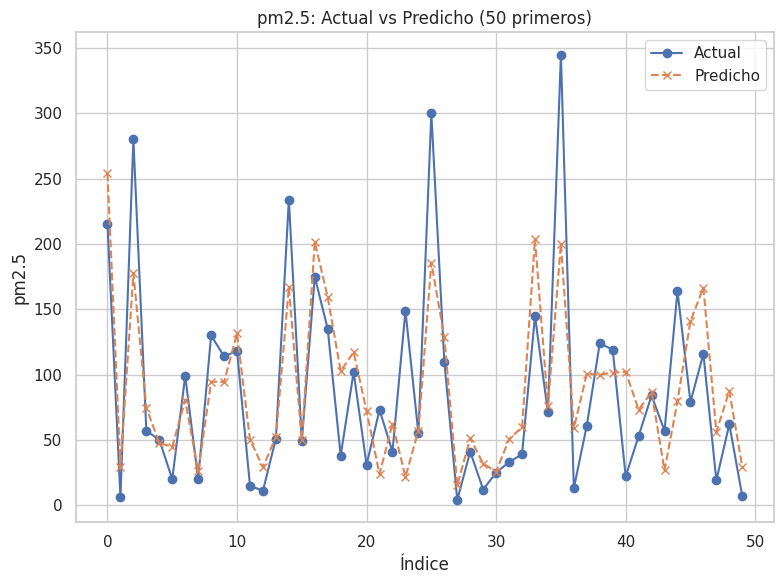

In [41]:
import os
import glob
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import joblib

# Ruta base
path = '/content/drive/MyDrive/Gonzalo/CD-P2 DEEP LEARNING/CLASE 4'

# 1. Cargar y preparar datos
raw = pd.read_csv(os.path.join(path, 'PRSA_data_2010.1.1-2014.12.31.csv'))
df = raw.dropna()
labels = df['pm2.5'].values
features = df.drop(columns=['pm2.5'])
# Codificar categóricas
features = pd.get_dummies(features, drop_first=True)
X = features.values

# 2. Dividir en train/validation
X_train, X_val, y_train, y_val = train_test_split(
    X, labels, test_size=0.2, random_state=42
)

# 3. Escalado de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
# Guardar escalador
joblib.dump(scaler, os.path.join(path, 'scaler_PM25.save'))

# 4. Definir y compilar el modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mse',
    metrics=['mae']
)

# 5. Callback para guardar mejores pesos
checkpoint_path = os.path.join(
    path, 'PRSA_PM25_MLP.{epoch:02d}-{val_loss:.4f}.keras'
)
checkpoint = ModelCheckpoint(
    checkpoint_path, monitor='val_loss', save_best_only=True,
    mode='min', save_freq='epoch'
)

# 6. Entrenamiento
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_data=(X_val, y_val),
    callbacks=[checkpoint],
    shuffle=True
)

# 7. Evaluación con el mejor modelo guardado
# Seleccionar el archivo más reciente
keras_files = glob.glob(os.path.join(path, '*.keras'))
best_model_file = max(keras_files, key=os.path.getctime)
print(f"Cargando mejor modelo: {os.path.basename(best_model_file)}")
best_model = load_model(best_model_file)

# Predicciones
y_pred = best_model.predict(X_val).squeeze()

# 8. Métricas de desempeño
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f"MAE validación: {mae:.4f}")
print(f"R2 validación: {r2:.4f}")

# 9. Gráfico Actual vs Predicho (primeros 50 puntos)
plt.figure(figsize=(8,6))
plt.plot(y_val[:50], marker='o', linestyle='-', label='Actual')
plt.plot(y_pred[:50], marker='x', linestyle='--', label='Predicho')
plt.title('pm2.5: Actual vs Predicho (50 primeros)')
plt.xlabel('Índice')
plt.ylabel('pm2.5')
plt.legend()
plt.tight_layout()
plt.show()


<font color='green'>**Fin Actividad 3**</font>

<img src="https://drive.google.com/uc?export=view&id=1DNuGbS1i-9it4Nyr3ZMncQz9cRhs2eJr" width="100" align="left" title="Runa-perth">
<br clear="left">

## <font color='green'>**Metodos de series de tiempo con deep learning.**</font>

Las redes neuronales se utilizan en una amplia variedad de aplicaciones relacionadas con series temporales, debido a su capacidad para aprender patrones y relaciones a partir de datos secuenciales. Las series temporales son secuencias de datos medidos en intervalos de tiempo consecutivos, y se utilizan en muchos campos, incluyendo finanzas, medicina, ingeniería y ciencias sociales.

Aquí hay un resumen de las principales aplicaciones de las redes neuronales en series temporales, así como los conceptos clave utilizados:

Predicción de series temporales: Las redes neuronales se utilizan para predecir futuros puntos en una serie temporal basándose en datos históricos. Esto es útil en áreas como la previsión del mercado de valores, la planificación de la demanda y la predicción del tiempo.

Clasificación de series temporales: Las redes neuronales pueden aprender patrones en series temporales y clasificarlas en diferentes categorías. Por ejemplo, en el campo de la medicina, las series temporales de señales de electrocardiograma (ECG) pueden ser clasificadas como normales o anormales.

Anomalía en la detección de series temporales: Las redes neuronales se utilizan para detectar puntos anómalos en una serie temporal. Esto es útil en áreas como el monitoreo de maquinaria industrial para detectar fallos antes de que ocurran.

Conceptos clave en el uso de redes neuronales para series temporales:

Redes neuronales recurrentes (RNN): Son un tipo de red neuronal que tiene conexiones que se retroalimentan, lo que les permite mantener un estado interno y recordar información de pasos anteriores. Son especialmente adecuadas para el análisis de series temporales.

LSTM (Long Short-Term Memory): Es un tipo de RNN que utiliza celdas de memoria para mantener un estado a lo largo de largas secuencias, lo que les permite aprender patrones a largo plazo en series temporales.

GRU (Gated Recurrent Unit): Es otro tipo de RNN que utiliza compuertas para regular el flujo de información, similar a las LSTM pero con una estructura más simple.

Transformadores: Son una arquitectura de red neuronal que utiliza mecanismos de atención para capturar relaciones en secuencias de datos. Se utilizan para modelar series temporales con patrones complejos y a largo plazo.

Ventanas de tiempo: Al trabajar con series temporales, a menudo se dividen en ventanas de tiempo o subsecuencias para entrenar a la red neuronal en patrones más cortos.

Descomposición de series temporales: Se puede descomponer una serie temporal en componentes como tendencia, estacionalidad y ruido, lo que facilita el análisis y la predicción.

Embeddings temporales: A veces, se utilizan técnicas de incrustación para convertir series temporales en representaciones de baja dimensión que pueden ser más fácilmente analizadas por redes neuronales.

En resumen, las redes neuronales son herramientas poderosas para el análisis de series temporales, y se utilizan en una amplia gama de aplicaciones para predecir, clasificar y detectar anomalías en datos secuenciales.

<img src="https://drive.google.com/uc?export=view&id=1Igtn9UXg6NGeRWsqh4hefQUjV0hmzlBv" width="100" align="left" title="Runa-perth">
<br clear="left">

## <font color='red'>**Otras Arquitecturas de redes para series de datos.**</font>

### Red LSTM (Long Short-Term Memory):

Las LSTM son un tipo de redes neuronales recurrentes (RNN) diseñadas específicamente para evitar el problema de la desaparición del gradiente. Son esenciales para tareas de secuencia debido a su capacidad para recordar información a largo plazo. Aquí hay un breve resumen:

1. Memoria a Largo Plazo: A diferencia de las redes neuronales tradicionales, las LSTM tienen una estructura de memoria que les ayuda a recordar patrones o secuencias durante largos períodos, lo que las hace ideales para tareas relacionadas con series temporales y procesamiento del lenguaje natural.

2. Unidades de Puerta: Una característica clave de las LSTM son sus "puertas" (gate units). Estas puertas determinan qué información debe ser almacenada o descartada en la memoria celular. Hay tres tipos principales de puertas en una LSTM:

  a. Puerta de Entrada (Input Gate): Decide cuánta información nueva se almacenará en la memoria celular.

  b. Puerta de Olvido (Forget Gate): Decide cuánta información de la memoria celular actual se descartará.
  
  c. Puerta de Salida (Output Gate): Basándose en la memoria celular, decide cuál será el próximo estado oculto.

3. Flexibilidad en Secuencias: Las LSTM pueden manejar secuencias de entrada de diferentes longitudes sin necesidad de especificar la longitud de la secuencia con antelación.

4. Aplicaciones: Debido a su capacidad para recordar a largo plazo, las LSTM se utilizan en una variedad de aplicaciones, como traducción automática, generación de texto, análisis de sentimiento, series temporales, entre otros.

5. Variantes: Hay diversas variantes y extensiones de las LSTM, como las GRU (Gated Recurrent Units), que simplifican la arquitectura de las LSTM pero retienen la mayoría de sus beneficios.

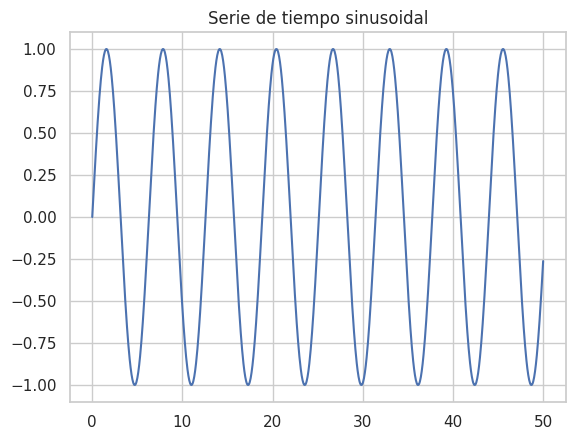

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos
x = np.linspace(0, 50, 1000)
y = np.sin(x)

plt.plot(x, y)
plt.title("Serie de tiempo sinusoidal")
plt.show()


In [44]:
def create_dataset(data, steps):
    X, Y = [], []
    for i in range(len(data)-steps-1):
        X.append(data[i:(i+steps)])
        Y.append(data[i + steps])
    return np.array(X), np.array(Y)

steps = 10
X, Y = create_dataset(y, steps)

# Reshape para [muestras, pasos de tiempo, características]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [45]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(30, activation='relu', input_shape=(steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
model.fit(X, Y, epochs=50, verbose=1)


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4392
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1740
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0513
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0117
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0080
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0039
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0020
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.2676e-04
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3991e-04
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.8887e-04
Epoch 13/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.7577e-04
Epoch 14/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.7858e-04
Epoch 15/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.34

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


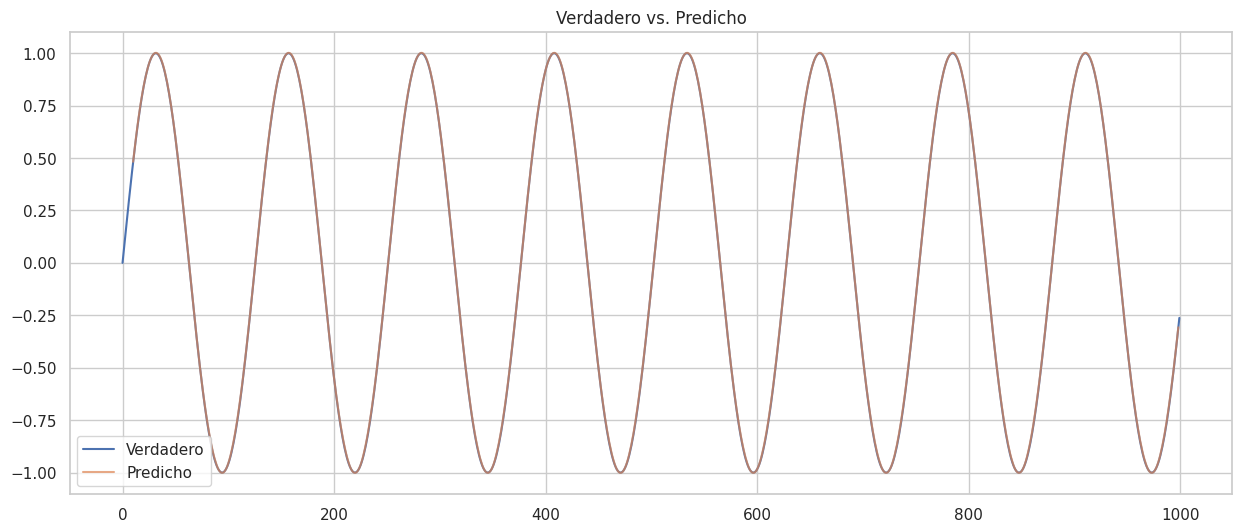

In [47]:
y_pred = model.predict(X)

plt.figure(figsize=(15,6))
plt.plot(y, label='Verdadero')
plt.plot(np.arange(steps, 1000-1), y_pred, label='Predicho', alpha=0.7)
plt.title("Verdadero vs. Predicho")
plt.legend()
plt.show()


# <font color='purple' style='bold' size=5>**EXPERIMENTO** </font>

**Genera una serie senoidal con ruido.**

Se crean muestras de tamaño 10 para predecir el siguiente valor.

Se divide en conjuntos de entrenamiento y prueba (sin barajar para mantener el orden temporal).

Escala tanto las entradas como la salida.

Se define un MLP de dos capas ocultas.

Se entrena durante 20 épocas.

Se desescalala las predicciones y calcula MAE y R².

Se grafican los primeros 100 valores reales vs predichos.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 1.3368 - val_loss: 0.1688
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1344 - val_loss: 0.0497
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0504 - val_loss: 0.0405
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0403 - val_loss: 0.0392
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0343 - val_loss: 0.0371
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0368 - val_loss: 0.0352
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0299 - val_loss: 0.0345
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0298 - val_loss: 0.0343
Epoch 9/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0295 - val_loss: 0.0339
Epoch 10/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0335 - val_loss: 0.0337
Epoch 11/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0313 - val_loss: 0.0343
Epoch 12/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0348 - val_l

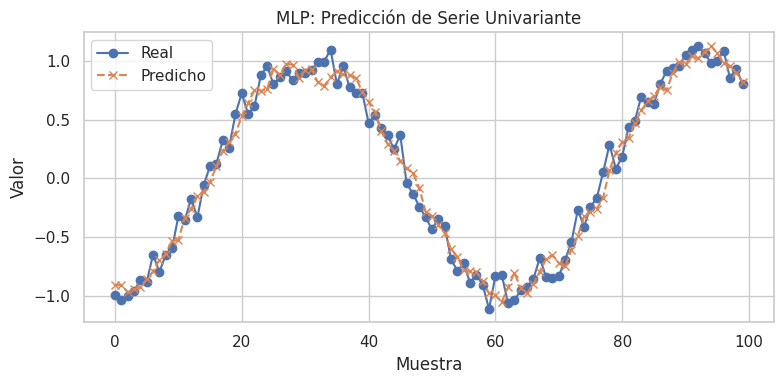

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. Generación de serie sintética (senoidal con ruido)
np.random.seed(42)
time = np.arange(0, 100, 0.1)
series = np.sin(time) + 0.1 * np.random.randn(len(time))

# 2. Creación de muestras con ventana deslizante
def create_dataset(series, window_size=10):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i + window_size])
        y.append(series[i + window_size])
    return np.array(X), np.array(y)

window_size = 10
X, y = create_dataset(series, window_size)

# 3. División train/test (80/20) sin barajar
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False
)

# 4. Escalado de entradas y salidas
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test  = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test  = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

# 5. Definición del MLP
model = Sequential([
    Dense(32, activation='relu', input_shape=(window_size,)),
    Dense(16, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# 6. Entrenamiento (20 épocas, validación interna)
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

# 7. Predicción e inversa de escala
y_pred_scaled = model.predict(X_test).ravel()
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_true = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

# 8. Cálculo de métricas
mae = mean_absolute_error(y_true, y_pred)
r2  = r2_score(y_true, y_pred)
print(f"MAE en test: {mae:.4f}")
print(f"R² en test: {r2:.4f}")

# 9. Gráfico de comparación (primeros 100 puntos)
plt.figure(figsize=(8, 4))
plt.plot(y_true[:100], marker='o', linestyle='-', label='Real')
plt.plot(y_pred[:100], marker='x', linestyle='--', label='Predicho')
plt.title('MLP: Predicción de Serie Univariante')
plt.xlabel('Muestra')
plt.ylabel('Valor')
plt.legend()
plt.tight_layout()
plt.show()


# <font color='purple' style='bold' size=5>**FIN EXPERIMENTO** </font>

# <font color='purple' style='bold' size=5>**MATERIAL ADICIONAL** </font>


El perceptrón fue propuesto por Frank Rosenblatt en 1958 como el primer modelo de neurona artificial capaz de aprender pesos a partir de ejemplos mediante un algoritmo de aprendizaje supervisado .

**Evolución hacia MLP**

En los años 80, Rumelhart, Hinton y Williams popularizaron el algoritmo de retropropagación de errores, permitiendo entrenar redes de múltiples capas (MLP) eficientemente .

**Aplicación a Series de Tiempo**

Aunque las RNN y LSTM dominan la predicción secuencial, los MLP siguen siendo una alternativa válida cuando la dependencia temporal es corta o se usa enfoque de ventanas deslizantes .


**Ventanas deslizantes vs. RNN**

Un MLP con ventana fija puede competir con una RNN en tareas donde la dependencia temporal no excede el tamaño de la ventana.

**Regularización sencilla**
Dropout y L2 ayudan a que el MLP no memorice ruido en series muy ruidosas .

**Shuffling**

Al entrenar en series temporales, evita barajar shuffle=False para no romper la correlación de orden (pero sí puedes mezclar minibatches internamente).

Efecto de la escala
Siempre escala tanto entradas como salidas: distintas escalas de magnitud afectan drásticamente la convergencia de Adam o SGD .

**Referencias Bibliográficas**

Rosenblatt, F. (1958). The Perceptron: A Probabilistic Model for Information Storage and Organization in the Brain. Psychological Review, 65(6), 386–408.

Rumelhart, D. E., Hinton, G. E., & Williams, R. J. (1986). Learning representations by back-propagating errors. Nature, 323, 533–536.

Zhang, G. P. (1998). Forecasting with artificial neural networks: The state of the art. International Journal of Forecasting, 14(1), 35–62.

Srivastava, N., Hinton, G., et al. (2014). Dropout: A Simple Way to Prevent Neural Networks from Overfitting. Journal of Machine Learning Research, 15(56), 1929–1958.

Ioffe, S., & Szegedy, C. (2015). Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift. arXiv:1502.03167.

In [49]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, r2_score

# Dataset sintético (como antes)
time = np.arange(0, 100, 0.1)
series = np.sin(time) + 0.1 * np.random.randn(len(time))
def make_dataset(s, w=10):
    X, y = [], []
    for i in range(len(s)-w):
        X.append(s[i:i+w]); y.append(s[i+w])
    return np.array(X), np.array(y)

X, y = make_dataset(series)
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, shuffle=False)

scX, scY = StandardScaler(), StandardScaler()
Xtr = scX.fit_transform(Xtr); Xte = scX.transform(Xte)
ytr = scY.fit_transform(ytr.reshape(-1,1)).ravel()
yte = scY.transform(yte.reshape(-1,1)).ravel()

# Modelo con BatchNorm y EarlyStopping
model = Sequential([
    Dense(64, input_shape=(Xtr.shape[1],), activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(1)
])
model.compile('adam', 'mse')
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    Xtr, ytr,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    callbacks=[es],
    verbose=1
)

# Evaluación
y_pred = model.predict(Xte).ravel()
y_pred = scY.inverse_transform(y_pred.reshape(-1,1)).ravel()
y_true = scY.inverse_transform(yte.reshape(-1,1)).ravel()

print("MAE:", mean_absolute_error(y_true, y_pred))
print("R2:", r2_score(y_true, y_pred))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.8087 - val_loss: 0.5177
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3969 - val_loss: 0.3182
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2714 - val_loss: 0.2993
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2127 - val_loss: 0.2442
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2188 - val_loss: 0.2086
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1578 - val_loss: 0.1393
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1652 - val_loss: 0.1069
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1524 - val_loss: 0.0658
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1397 - val_loss: 0.0426
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1542 - val_loss: 0.0414
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1794 - val_loss: 0.0365
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1578 - val_loss: 0.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
MAE: 0.09930838957342558
R2: 0.970045288398736


# <font color='purple' style='bold' size=5>**FIN MATERIAL ADICIONAL** </font>